# Aggregated Residual Transformations for Deep Neural Networks
---
* [링크](https://arxiv.org/abs/1611.05431)
* ILSVRC(ImageNet Large Scale Visual Recognition Challenge) 2016 대회에서 2등을 차지한 모델.
    * Resnet의 발전 버전.

## Introduce
---
* 간단한 불록을 반복해서 쌓은 구조.
* homogeneous하고, 다중 분기 구조.
    * 각 레이어나 노드가 유사한 특성을 지님.
    * 하이퍼파라미터 수가 적음.
* **Cardinality**라는 새로운 개념이 등장.
    * 기존의 네트워크에서는 깊이(레이어의 수)와 폭(레이어의 노드 수)가 주요 성는 결정 요소
    * 더 정교하고 효율적 모델 구축.


## Block
---
* VGGNet과 ResNet과 같이 동일한 형태의 Block을 깊게 쌓는 것은 특정 데이터 셋에 하이퍼파라미터를 과도하게 적응하는 위험을 줄임.
    * 특정 데이터 셋에 과정합 방지 및 일반화 능력을 향상.
    * 모델의 복잡성을 줄이고 모델의 성능 향상에 도움.
* VGG구조  
![ㅇㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png)
* ResNet구조  
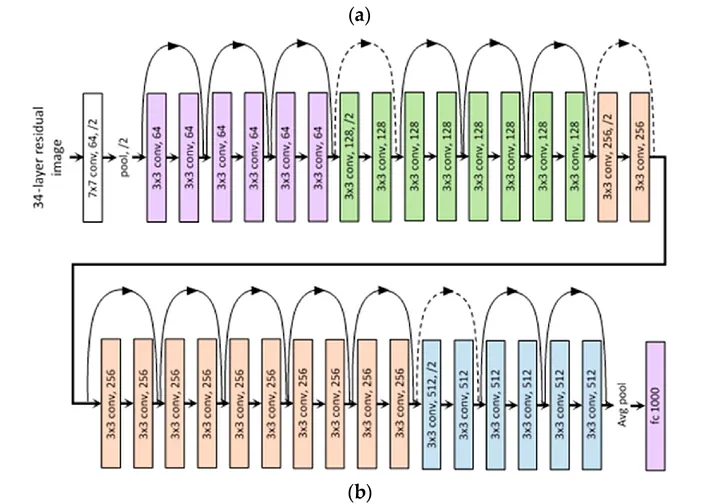

</br>

* Inception은 신중하게 설계된 토폴로지가 복잡한 계산 없이도 높은 정확도를 달성.
    * **'split-transform-merge(분할-변환-병합)'**
    * 하지만 새로운 데이터셋에 적응시킬 때, 특히 하이퍼파라미터가 많을 때는 어떻게
    할지 명확하지 않음.
* Inception 구조  
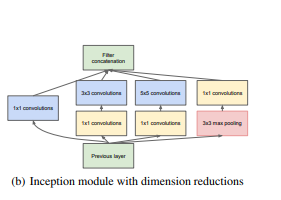

</br>

* VGG/ResNet의 레이어를 반복하는 전략을 채택하고 split-transform-merge을 쉽고 확장 가능 한 방식으로 활용한 간단한 Architecture를 제시.


## Architecture
---

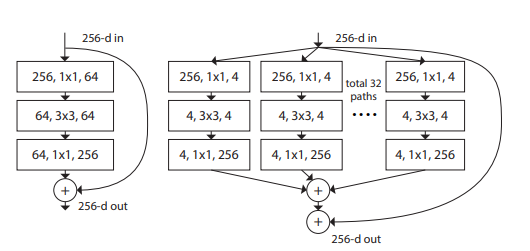

</br>

* 간단히 보면 Inception + shortcut와 유사
* 모든 경로가 동일한 토폴로지를 공유.
* 깊이와 너비를 늘리는 과정이 쉬움.



## Rules
---
* VGG/ResNet에서 영감 받아 비슷한 방식 architecture를 구성
* 총 두가지의 규칙으로 생성.
    * 최대한 모든 불록이 대략적으로 같은 계산량(FLOPs)를 가지도록 보장.
* Rule 1:
    * spatial maps(feature map)이 크기가 같은 경우(입력과 출력의 해상도가 같은 경우) 블록들이 동일한 하이퍼파라미터(불록의 너비의 필터 크기)를 공유.
* Rule 2:
    * spatial map이 두배로 다운샘플링 되면(해상도가 절반으로 줄어들면), 불록의 너비가 두배가 됨
    * 정보 손실 보상 및 블록의 계산 복잡성 일정하게 유지.

## Aggregated Transformations
---
* Depth를 증가시키는 방법을 사용하는 Network in Network과는 반대로, Network in Neuron를 사용.
  * 각 뉴런 내에서 연산을 수행하는 복잡한 함수나 네트워크를 사용하는 것을 의미.
  * 뉴런이 처리할 수 있는 정보의 양과 다양성을 늘림.
  * 신경망의 새로운 차원으로 확장.


* ResNeXt Block을 나타내는 식  
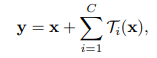

* y : output
* x : input
* $T_i$ : 1가지 path를 거치면서 수행하는 연산
* C : cardinality로 채널 수로 몇개의 그룹으로 분할할지 조절하는 수.

* 구현
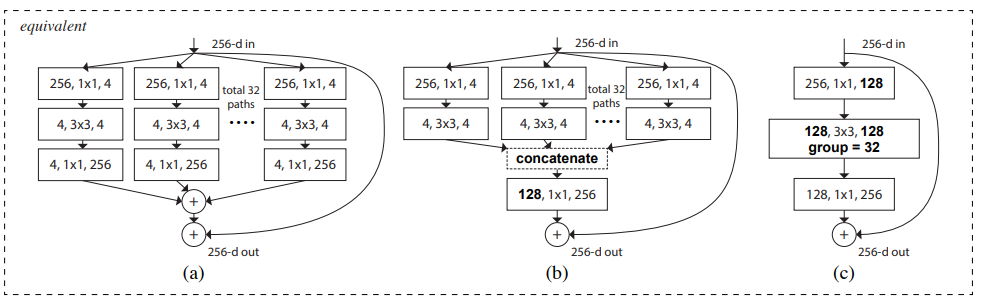


## (a)
* 256개의 채널에 1×1Conv연산을 32번 진행 후 각각 4개의 채널로 만듭니다.(총 4×32=128채널)
* 32개의 그룹의 각 4개의 채널에 대해 3×3 Conv연산을 진행. 마찬가지로 각각 4개의 채널로 만듬.
* 마지막으로 32개의 그룹에 1×1 Conv연산을 진행하여 각각 256개의 채널로 만듬.
* 이후 32개의 그룹의 각 256개의 채널을 더함.

## (b)
* 1x1 Conv 연산 대신 Concatenate를 진행하고 1x1 Conv를 적용시키는 방식.
* Concat 연산을 진행하면 32x4의 채널.

## (c)
* Group Convolution을 이용
* 처음 256개의 채널에 1×1 Conv연산 진행하여 128개의 채널을 만듬..
* 128개의 채널에 대해 32개의 그룹으로 3×3 Conv를 진행하여 128개의 채널을 만듬.
* 128개의 채널에 대해 1×1 Conv를 진행하여 256개의 채널로 만듬.

* 구조  
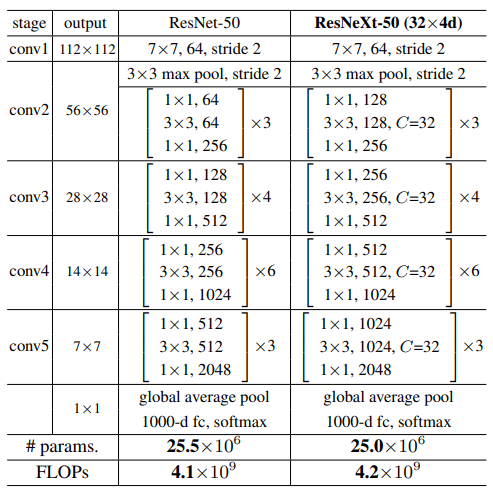

* 채널의 너비는 넓어졌지만, 파라미터 수는 오히려 감소.

## Model capacity
---
* cardinality를 하이퍼 파라미터로 두고, 실험을 진행.
* ResNet-50 모델과의 비교를 위해 아래와 같이 설정.
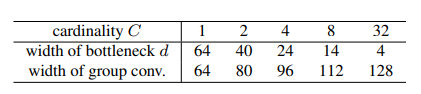

* width of bottleneck d : 1x1의 Conv의 수
* width of group conv : 3x3 conv 레이어의 출력 채널 개수

## Cardinality vs Width
---
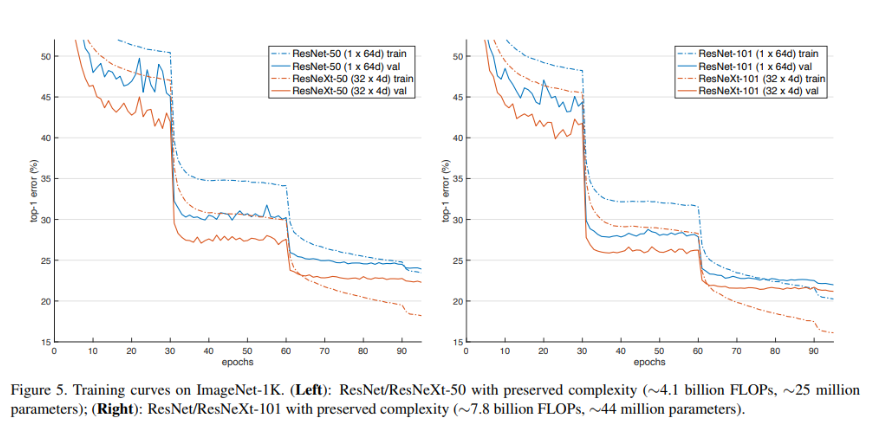

* 동일한 깊이 일때 ResNet보다 ResNext가 더 좋음

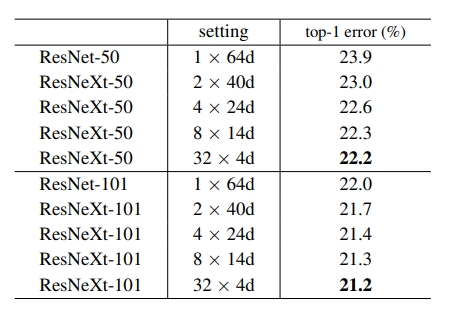

* 같은 깊이 일 때 그룹이 증가할 수록 성능이 좋아짐.

## Increasing Cardinality vs Deeper/Wider
* 말 그대로 cardinality, 혹은 deeper/wider중 어떤 것이 더 좋은지 평가.

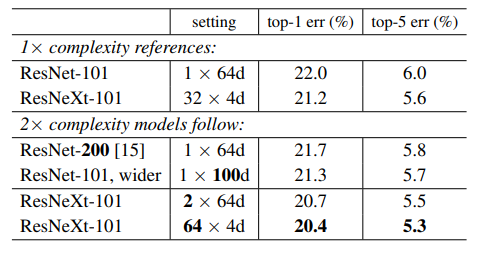

* 성능
* ResNet-200 < ResNet-101,wider < ResNeXt-101 의 순서로 좋음
* Cardinality가 가장 큰 영향

## Residual connection
---
* shorcut의 유무에 따른 성능 비교
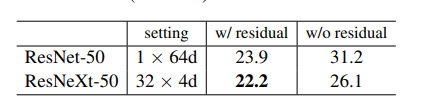

* shortcut를 제거하면 성능이 더 떨어짐.

## 최신 모델들과의 비교

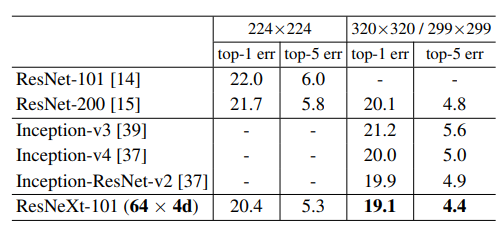